In [49]:
import pandas as pd

In [2]:
review_restaurant = pd.read_pickle('../data/all-restaurants/restaurant_review.pickle')

In [3]:
business_restaurant = pd.read_pickle('../data/all-restaurants/restaurants.pickle')

In [13]:
categories_df = pd.read_csv('../data/all-restaurants/categories.csv')
cuisine = categories_df['cuisine'].tolist()
food = categories_df['food'].tolist()
rest_type = categories_df['rest_type'].tolist()
diet = categories_df['diet'].tolist()

In [51]:
cuisine_dict = dict()
food_dict = dict()
rest_type_dict = dict()
diet_dict = dict()
business_type_dict = dict()
stars_dict = dict()
city_dict = dict()
state_dict = dict()

cuisine_cnt = 0
food_cnt = 0
rest_type_cnt = 0
diet_cnt = 0
business_type_cnt = 0

In [6]:
review_restaurant = review_restaurant[['business_id', 'stars']]

In [7]:
review_restaurant = review_restaurant.rename(columns={'stars':'rating'})

In [8]:
df = pd.merge(review_restaurant, business_restaurant, how="left", on=["business_id"])

In [9]:
df.head()

,business_id,rating,attributes.Music,name,attributes.OutdoorSeating,attributes.HasTV,attributes.ByAppointmentOnly,review_count,attributes.RestaurantsTableService,attributes.NoiseLevel,...,attributes.BYOBCorkage,attributes.DietaryRestrictions,attributes.BYOB,attributes.BusinessAcceptsCreditCards,attributes.HappyHour,attributes.RestaurantsPriceRange2,attributes.GoodForDancing,hours.Friday,attributes.Corkage,restaurant
0,buF9druCkbuXLX526sGELQ,4.0,NaN,Prides Osteria,False,True,NaN,83,NaN,u'average',...,NaN,NaN,NaN,True,NaN,3,NaN,17:0-23:0,NaN,True
1,0AzLzHfOJgL7ROwhdww2ew,2.0,NaN,Renaissance Orlando at SeaWorld,True,True,True,290,NaN,u'quiet',...,NaN,NaN,NaN,True,NaN,3,NaN,0:0-0:0,NaN,True
2,8zehGz9jnxPqXtOc7KaJxA,4.0,NaN,Brasserie Ten Ten,True,True,False,977,NaN,u'average',...,NaN,NaN,NaN,True,True,2,NaN,11:0-23:0,NaN,True
3,xGXzsc-hzam-VArK6eTvtw,1.0,"{'dj': False, 'background_music': False, 'no_m...",The Burren,True,False,NaN,499,NaN,u'loud',...,'no',NaN,NaN,True,NaN,2,True,11:30-1:0,False,True
4,EXOsmAB1s71WePlQk0WZrA,2.0,NaN,Linwood Grill & BBQ Restaurant,True,NaN,NaN,14,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True


In [52]:
for index, row in df.iterrows():
    for c in row['categories'].split(", "):
        if c != 'Restaurants' and c != "Food":
            if c in cuisine:
                cuisine_cnt += 1
                if c not in cuisine_dict:
                    cuisine_dict[c] = 1
                else:
                    cuisine_dict[c] += 1
            elif c in food:
                food_cnt += 1
                if c not in food_dict:
                    food_dict[c] = 1
                else:
                    food_dict[c] += 1
            elif c in rest_type:
                rest_type_cnt += 1
                if c not in rest_type_dict:
                    rest_type_dict[c] = 1
                else:
                    rest_type_dict[c] += 1
            elif c in diet:
                diet_cnt += 1
                if c not in diet_dict:
                    diet_dict[c] = 1
                else:
                    diet_dict[c] += 1
            else:
                business_type_cnt += 1
                if c not in business_type_dict:
                    business_type_dict[c] = 1
                else:
                    business_type_dict[c] += 1
    if row['stars'] not in stars_dict:
        stars_dict[row['stars']] = 1
    else:
        stars_dict[row['stars']] += 1
    if row['city'] not in city_dict:
        city_dict[row['city']] = 1
    else:
        city_dict[row['city']] += 1
    if row['state'] not in state_dict:
        state_dict[row['state']] = 1
    else:
        state_dict[row['state']] += 1

In [53]:
categories = set()
for index, row in business_restaurant.iterrows():
    for c in row['categories'].split(", "):
        if c != 'Restaurants' and c != "Food":
            categories.add(c)

In [48]:
len(categories)

725

In [54]:
print("Cuisine: ", cuisine_cnt)
print("Food: ", food_cnt)
print("Diet: ", diet_cnt)
print("Rest Type: ", rest_type_cnt)
print("Business Type: ", business_type_cnt)

Cuisine:  6434902
Food:  6240628
Diet:  679701
Rest Type:  8663238
Business Type:  1596535


In [16]:
import matplotlib.pyplot as plt

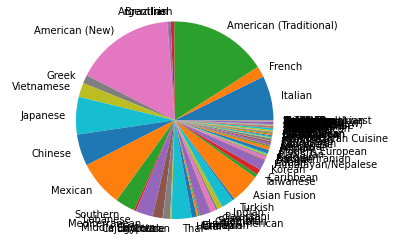

In [17]:
labels = []
sizes = []

for x, y in cuisine_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

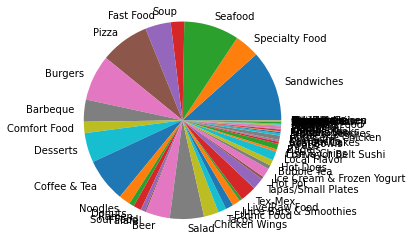

In [55]:
labels = []
sizes = []

for x, y in food_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
patches, texts = plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

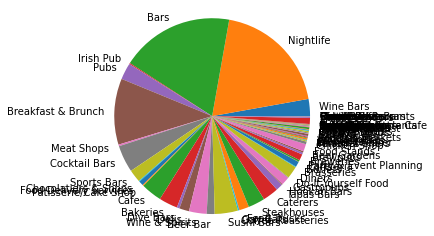

In [20]:
labels = []
sizes = []

for x, y in rest_type_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

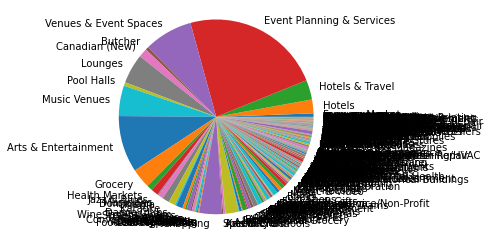

In [21]:
labels = []
sizes = []

for x, y in business_type_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

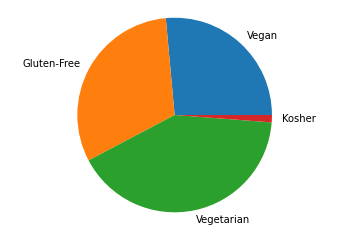

In [22]:
labels = []
sizes = []

for x, y in diet_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

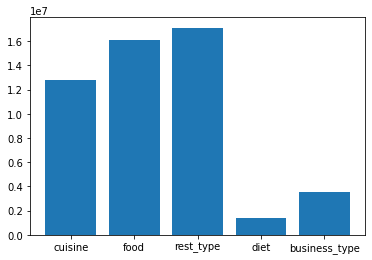

In [28]:
plt.bar(['cuisine','food','rest_type', 'diet','business_type'], [cuisine_cnt, food_cnt, rest_type_cnt, diet_cnt, business_type_cnt])
plt.show()

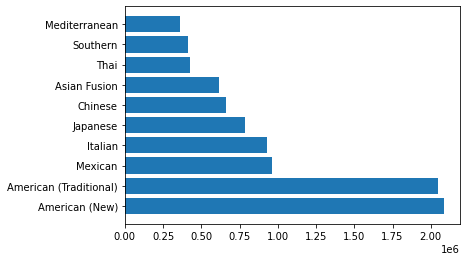

In [37]:
top_cuisine = sorted(cuisine_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_cuisine:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()


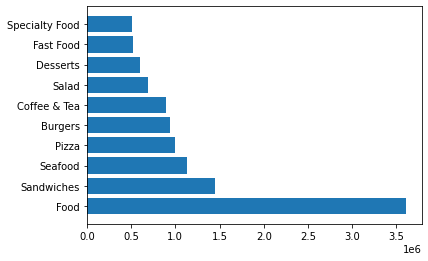

In [38]:
top_food = sorted(food_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_food:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

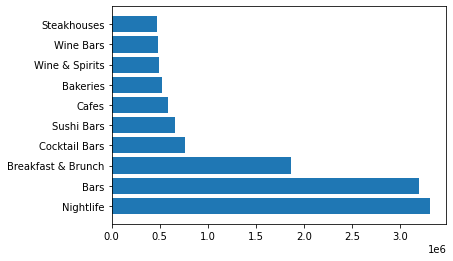

In [39]:
top_rest_type = sorted(rest_type_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_rest_type:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

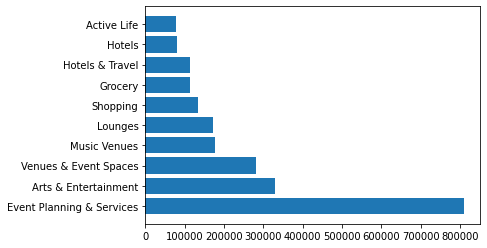

In [40]:
top_business_type = sorted(business_type_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_business_type:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

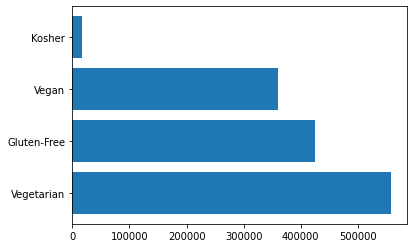

In [41]:
top_diet = sorted(diet_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_diet:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

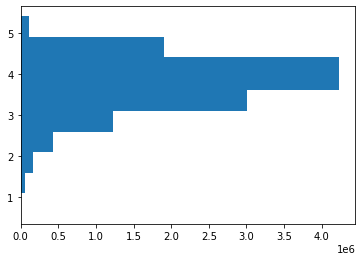

In [42]:
top_stars = sorted(stars_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_stars:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

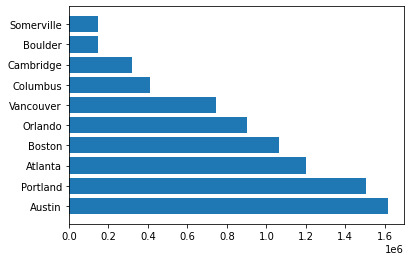

In [43]:
top_city = sorted(city_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_city:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()

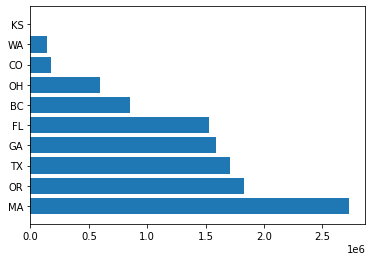

In [44]:
top_state = sorted(state_dict.items(), key=lambda item: item[1], reverse=True)[0:10]
labels = []
values = []
for x, y in top_state:
    labels.append(x)
    values.append(y)

plt.barh(labels, values)
plt.show()